<a href="https://www.kaggle.com/code/search4/superstore-eda-regression?scriptVersionId=153330453" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Name: Archana Yadav

> # Superstore Sales forecasting

# Problem Statement:
* To increase the Superstore sales, superstore gave us a task to understand what segments, regions, cities or customers they should be focusing on. The goal is to give practical insights to improve profit based on sales. 
* In the dynamic world of retail, forecasting sales accurately is a critical aspect of optimizing operations, managing inventory, and ensuring profitability. This project revolves around a retail dataset spanning four years from a global superstore. This will done using EDA and Regression Technique


# Objective
* To Perform EDA and Predict the sales of the next 7 days from the last date of the Training dataset!


# Solution:
* Perform EDA (Data Analysis,Data Visualization, Data Cleaning) to understand the data and to clean the dataset for further process
* Perform data preprocessing if required
* Build pipeline to train  and test the ML Regression model
* Model Evaluation
* Conclusion


# Dataset: 

Superstore Sales Dataset: https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting/

rows = 9800, columns = 18

**Dataset Columns:**
* Row ID : 'Unique Order ID for each Customer'
* Order ID: 'Unique ID for each row', 
* Order Date: 'Order Date of the product', 
* Ship Date: 'Shipping Date of the Product',
* Ship Mode: 'Shipping Mode specified by the Customer',
* Customer ID: 'Unique ID to identify each Customer',
* Customer Name: 'Name of the Customer', 
* Segment: 'The segment where the Customer belongs',
* Country: 'Country of residence of the Customer', 
* City: 'City of residence of of the Customer',
* State: 'State of residence of the Customer', 
* Postal Code: 'Postal Code of every Customer',
* Region: 'Region where the Customer belong',
* Product ID: 'Unique ID of the Product',
* Category: 'Category of the product ordered', 
* Sub-Category: 'Sub-Category of the product ordered',
* Product Name: 'Name of the Product',
* Sales: 'Sales of the Product'

# Packages

In [135]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import pipeline
from sklearn.preprocessing import LabelEncoder
from scipy import stats 
import time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR         
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Data

In [136]:
df = pd.read_csv('/kaggle/input/sales-forecasting/train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# Exploratory Data Analysis

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

## Handle missing values

* As here you can see Postal Code column having 11 missing values
* 1st we can check relation between Country,City,State with Postal Code so, if possible then to treat the missing value we can replace it appropiate/ respective values 

In [138]:
df.loc[df["Postal Code"].isna(),['Country','City','State','Postal Code']]

,Country,City,State,Postal Code
2234,United States,Burlington,Vermont,NaN
5274,United States,Burlington,Vermont,NaN
8798,United States,Burlington,Vermont,NaN
9146,United States,Burlington,Vermont,NaN
9147,United States,Burlington,Vermont,NaN
9148,United States,Burlington,Vermont,NaN
9386,United States,Burlington,Vermont,NaN
9387,United States,Burlington,Vermont,NaN
9388,United States,Burlington,Vermont,NaN
9389,United States,Burlington,Vermont,NaN


In [139]:
df.loc[(df['City']=='Burlington') & (df['State']=='Vermont'),['Country','Postal Code']]

,Country,Postal Code
2234,United States,NaN
5274,United States,NaN
8798,United States,NaN
9146,United States,NaN
9147,United States,NaN
9148,United States,NaN
9386,United States,NaN
9387,United States,NaN
9388,United States,NaN
9389,United States,NaN


**Observation**
* Here you can see where State is Vermount and City is Burlington we don't have any Postal Code in this dataset
* So we have two option to deal with this
    1. Remove all missing data
    2. Check Postal Code for this State and City online and place that value here
* As we know how much data are important so 1st we'll try to search Postal Code online and try to use that

**Search Result**
* You can check for postal code of burlington city in vermont for shipping & you'll get the search result as :
            **ZIP Code 05401**
* So here to deal with missing value we are going to use 05401
* Before performing any operation on the data set first you need to create a copy and then do all the operation.

In [140]:
train = df.copy()
train['Postal Code'] = train['Postal Code'].fillna(5401) # leading zeros in decimal integer literals are not permitted so we use 5401

In [141]:
train.isna().sum().sum()

0

## Drop Unwanted Features

* As you can see there is no use of Row ID, Order ID, Customer ID and Customer Name to train our model so just remove these. 

In [142]:
train.drop(['Row ID','Customer Name','Order ID','Product ID'],axis=1,inplace=True)

## Check and drop Duplicate data

In [143]:
train[train.duplicated()]

,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
3406,23/04/2015,27/04/2015,Standard Class,LB-16795,Home Office,United States,Columbus,Ohio,43229.0,East,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372


In [144]:
train.drop_duplicates(inplace=True)
train.duplicated().sum()

0

## Convert Order date and ship date dtype object to datetime and Postal Code float to int

* To play with dates first need to convert these columns with datetime data type

In [145]:
train['Order Date'] = pd.to_datetime(train['Order Date'], format='%d/%m/%Y') 
train['Ship Date'] = pd.to_datetime(train['Ship Date'], format='%d/%m/%Y')  
train['Postal Code'] = train['Postal Code'].astype(int)

* Here we seperate out the month, year,dates for further analysis

In [146]:
train.insert(loc=4,  column='order_month_year',value=train['Order Date'].dt.to_period('M'))
train.insert(loc=5, column='ship_month_year', value=train['Ship Date'].dt.to_period('M'))

train.insert(loc=6, column='order_day', value=train['Order Date'].dt.day)
train.insert(loc=7, column='order_month', value=train['Order Date'].dt.month)
train.insert(loc=8, column='order_year', value=train['Order Date'].dt.year)

train.insert(loc=9, column='ship_day', value=train['Ship Date'].dt.day)
train.insert(loc=10, column='ship_month', value=train['Ship Date'].dt.month)
train.insert(loc=11, column='ship_year', value=train['Ship Date'].dt.year)

In [147]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9799 entries, 0 to 9799
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order Date        9799 non-null   datetime64[ns]
 1   Ship Date         9799 non-null   datetime64[ns]
 2   Ship Mode         9799 non-null   object        
 3   Customer ID       9799 non-null   object        
 4   order_month_year  9799 non-null   period[M]     
 5   ship_month_year   9799 non-null   period[M]     
 6   order_day         9799 non-null   int32         
 7   order_month       9799 non-null   int32         
 8   order_year        9799 non-null   int32         
 9   ship_day          9799 non-null   int32         
 10  ship_month        9799 non-null   int32         
 11  ship_year         9799 non-null   int32         
 12  Segment           9799 non-null   object        
 13  Country           9799 non-null   object        
 14  City              9799 non-nu

In [148]:
pd.set_option('display.max_columns', None)
train.head(3)

,Order Date,Ship Date,Ship Mode,Customer ID,order_month_year,ship_month_year,order_day,order_month,order_year,ship_day,ship_month,ship_year,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
0,2017-11-08,2017-11-11,Second Class,CG-12520,2017-11,2017-11,8,11,2017,11,11,2017,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2017-11-08,2017-11-11,Second Class,CG-12520,2017-11,2017-11,8,11,2017,11,11,2017,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,2017-06-12,2017-06-16,Second Class,DV-13045,2017-06,2017-06,12,6,2017,16,6,2017,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


## Univariate

## Target variable

In [149]:
train.Sales.describe()

count     9799.000000
mean       230.763895
std        626.683644
min          0.444000
25%         17.248000
50%         54.480000
75%        210.572000
max      22638.480000
Name: Sales, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


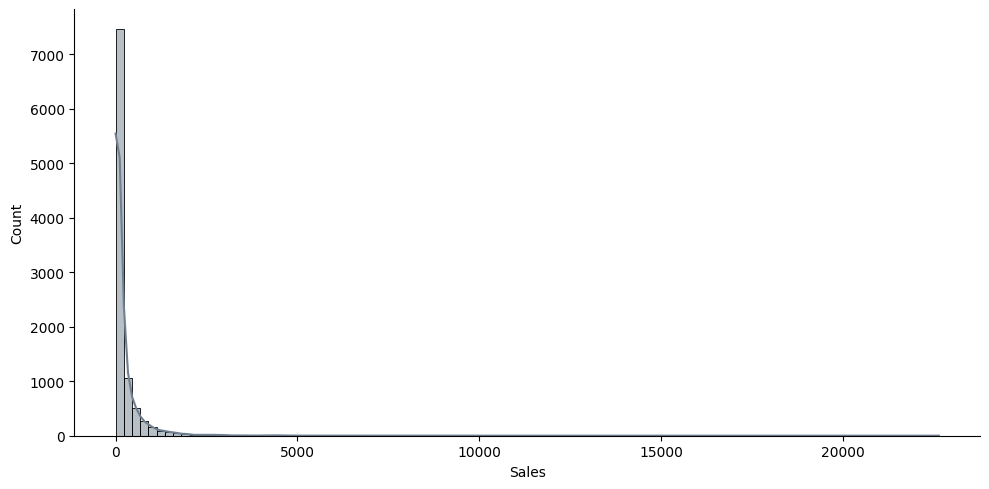

In [150]:
sns.displot(train['Sales'],kde=True,aspect=2,color='slategray',bins=100);

**Observation**
* Approx Product Sales are 12K to 26K

<Axes: >

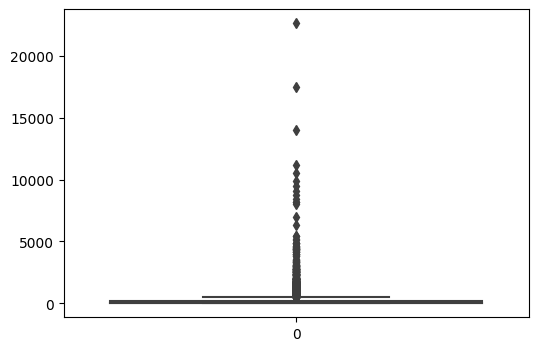

In [151]:
plt.figure(figsize=(6,4))
sns.boxplot(train['Sales'])

## Categorical data

**Ordinal Data**

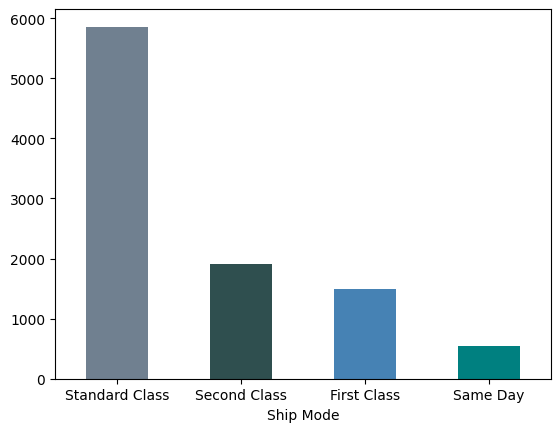

In [152]:
color_list = ['slategray','darkslategray','steelblue','teal','cadetblue','powderblue']

train['Ship Mode'].value_counts().plot.bar(color = color_list)
plt.xticks(rotation=360);

**Observation**
* 5859 orders were shipped by Standrad Class ship mode

## Categorical data

**Nominal Data**

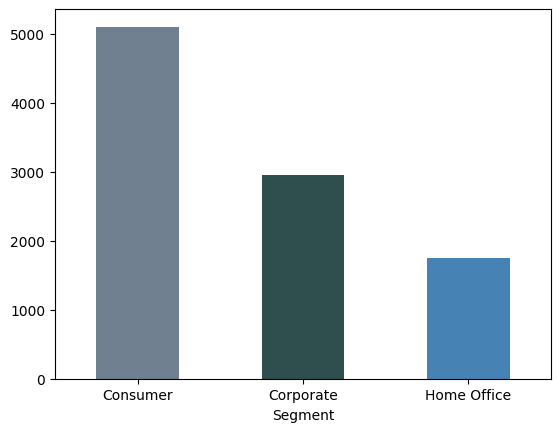

In [153]:
train['Segment'].value_counts().plot.bar(color = color_list)
plt.xticks(rotation=360);

**Observation**
* Approx 52% of segments for product sales was Consumers

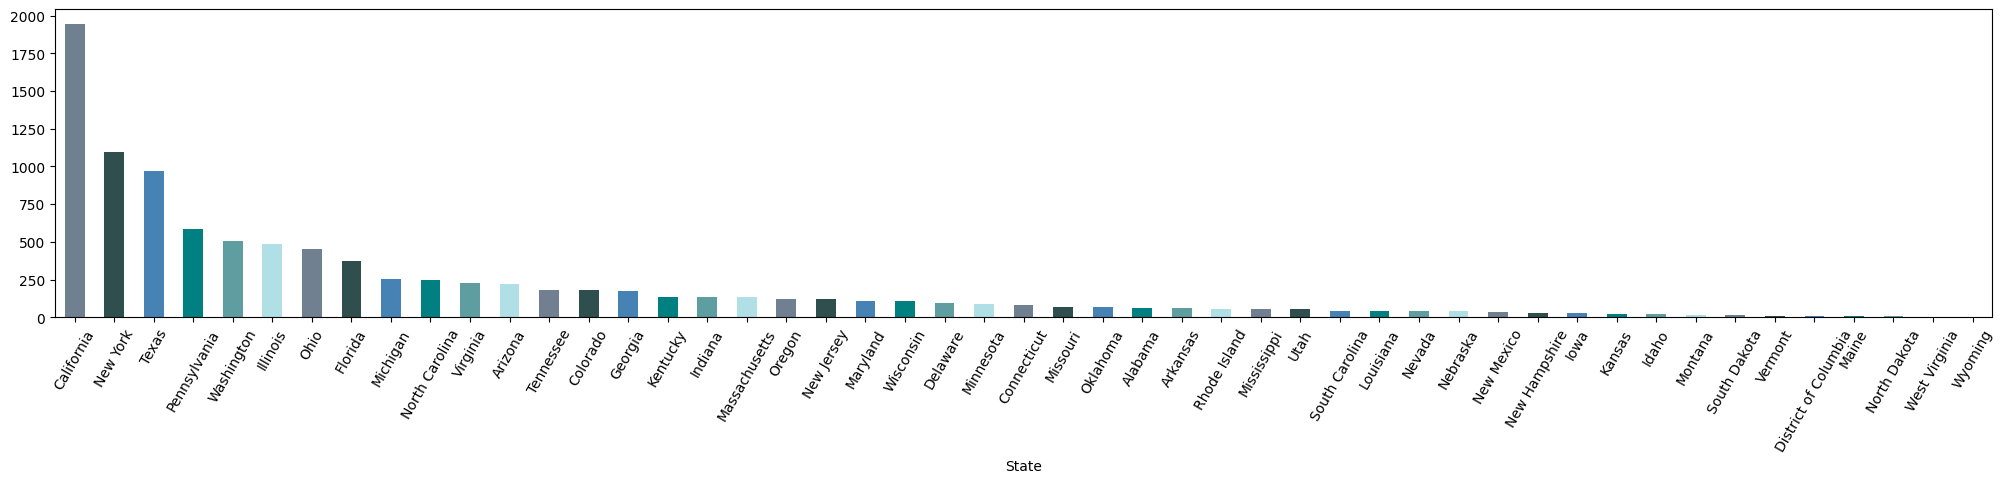

In [154]:
plt.figure(figsize=(25,4))
train['State'].value_counts().plot.bar(color = color_list)
plt.xticks(rotation=60);

**Observation**
* Approx 20% order was placed by State California             

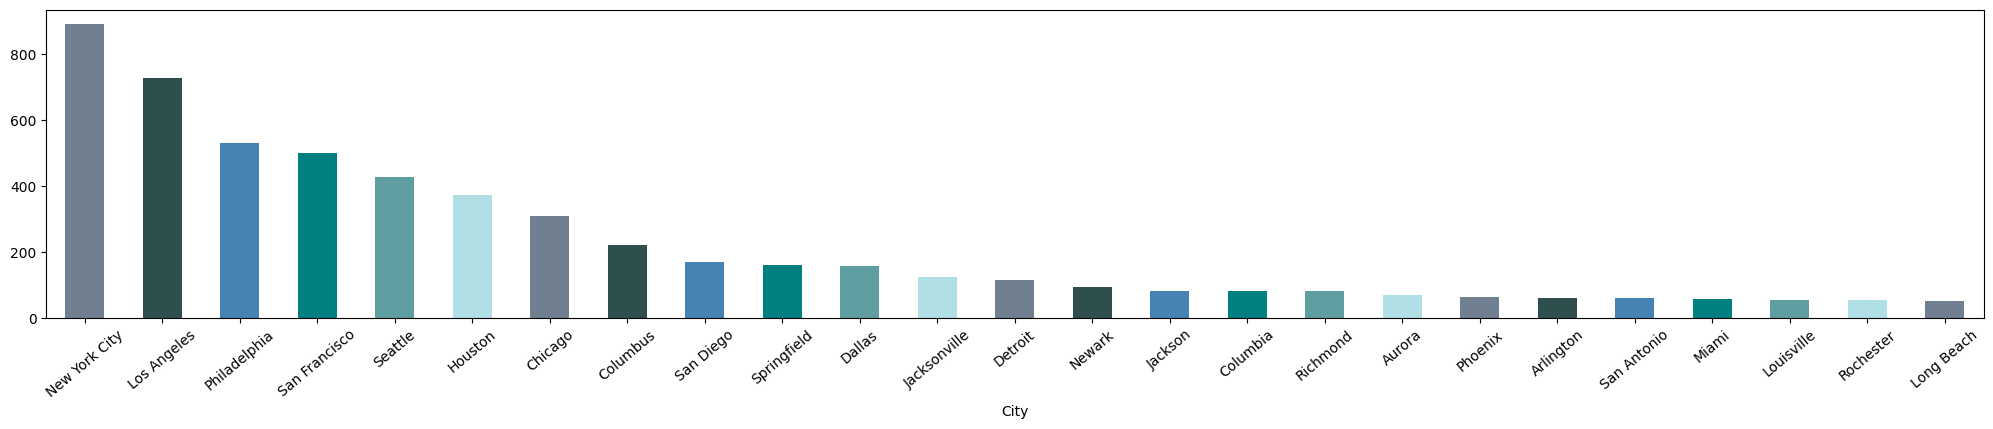

In [155]:
plt.figure(figsize=(25,4))
train['City'].value_counts().head(25).plot.bar(color = color_list)
plt.xticks(rotation=40);

**Observation**
* New York City citizen were contributing approx 9% in overall product sales

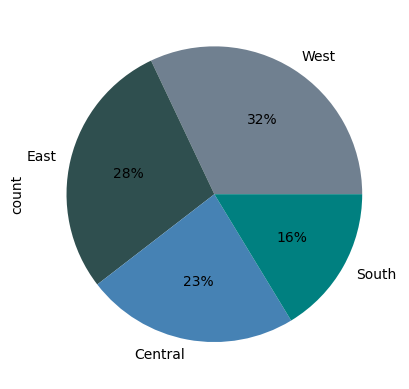

In [156]:
train['Region'].value_counts().plot.pie(subplots=True,autopct='%1.0f%%',colors=color_list);

**Observation**
* 32% customers are Western Region of United State where as 16% are from Southern Region  

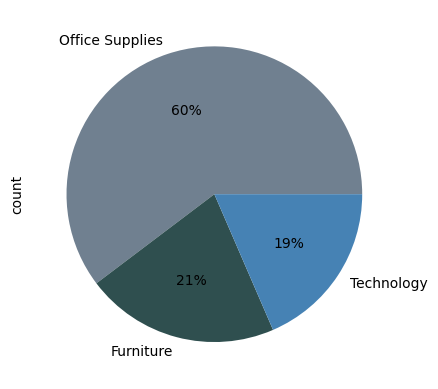

In [157]:
train['Category'].value_counts().plot.pie(subplots=True,autopct='%1.0f%%',colors=color_list);

**Observation**
* 60% of product was sale are belongs to Office Supplies Category

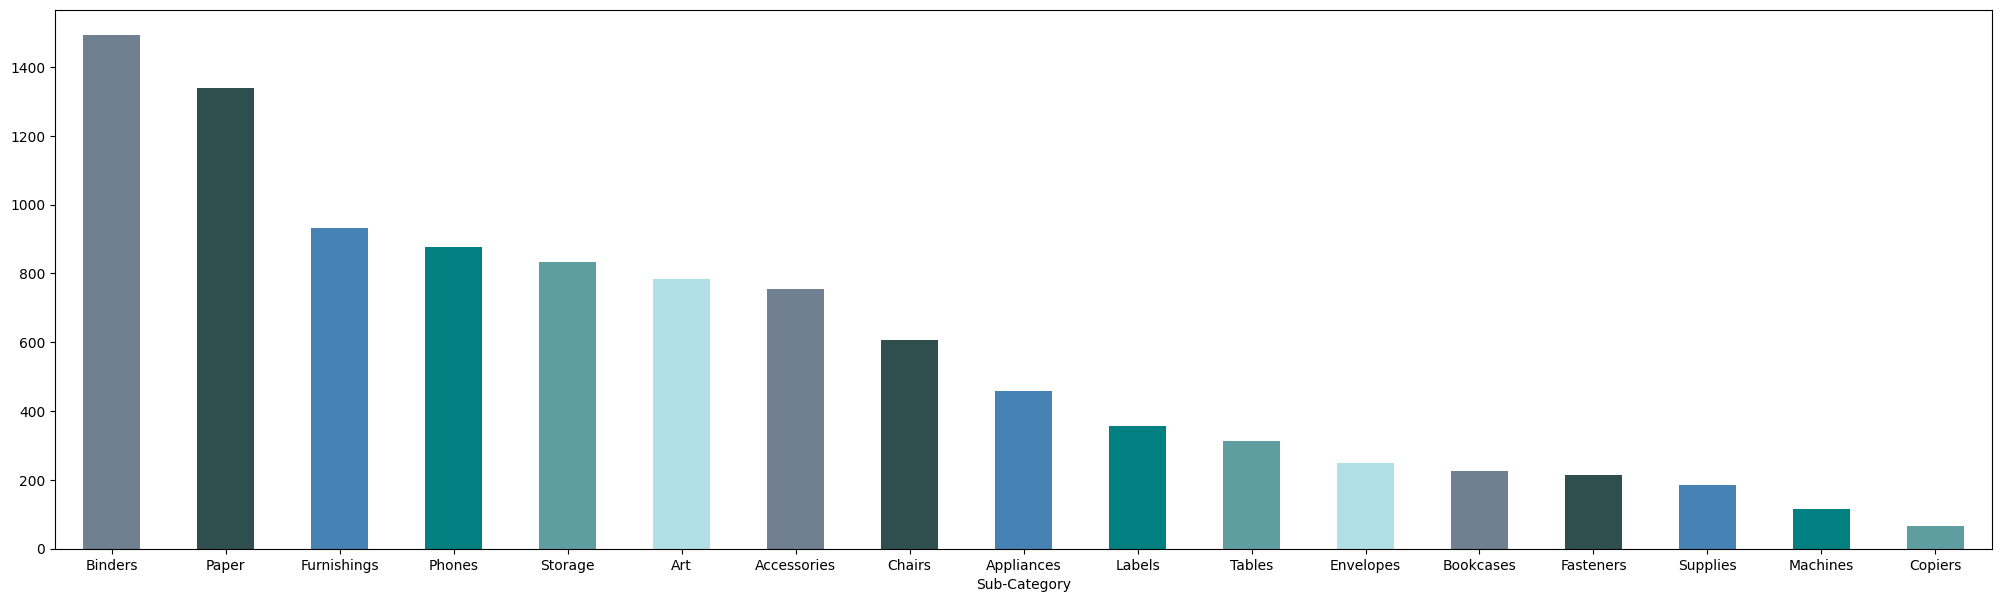

In [158]:
plt.figure(figsize=(25,7))
train['Sub-Category'].value_counts().plot.bar(color = color_list)
plt.xticks(rotation=360);

**Observation**
* In overall sub-category approx 15% are Binders

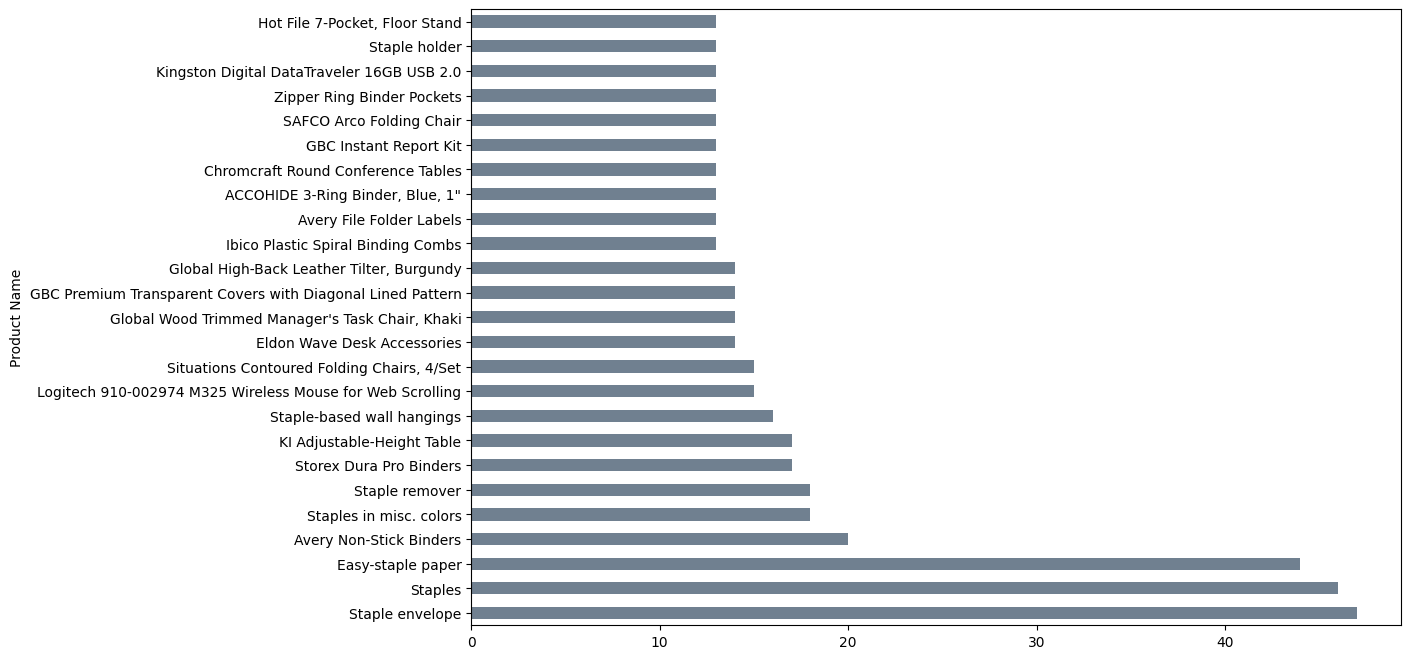

In [159]:
plt.figure(figsize=(12,8))
train['Product Name'].value_counts().head(25).plot.barh(color = 'Slategrey');

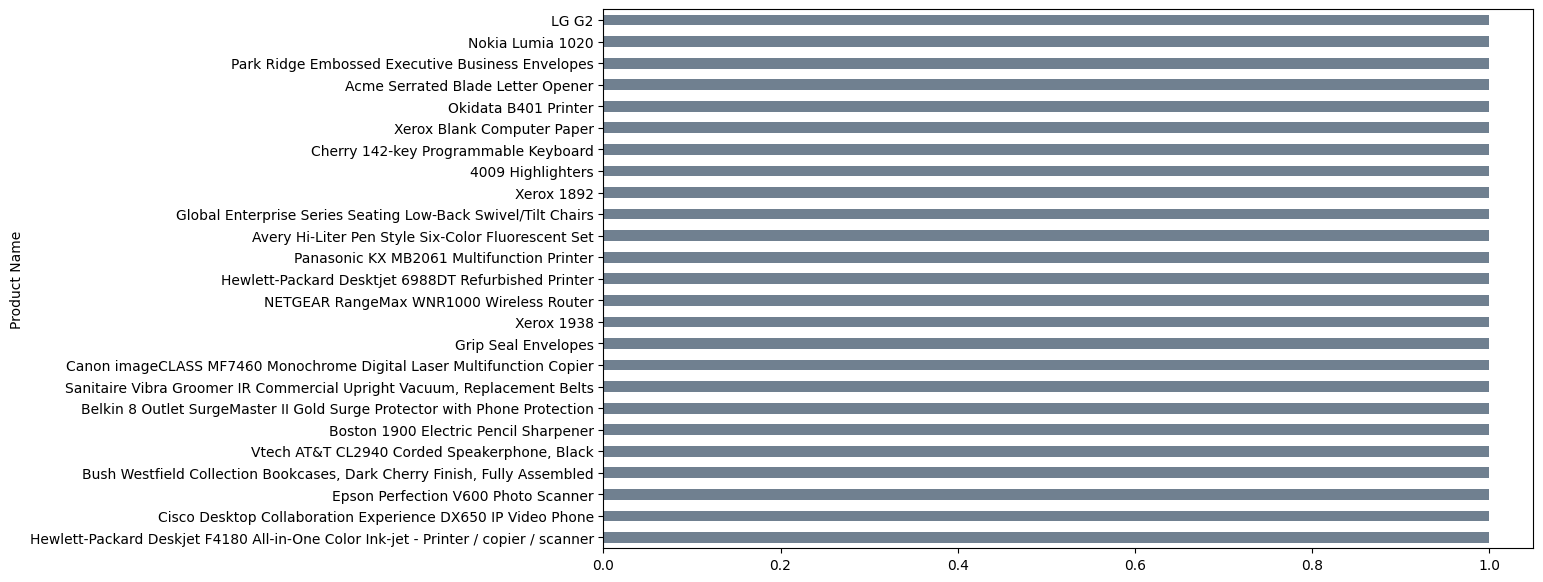

In [160]:
plt.figure(figsize=(12,7))
train['Product Name'].value_counts().sort_values(ascending=False).tail(25).plot.barh(color = 'Slategrey');

**Observation**
* Staple envelope, Staples, Easy-staple paper are most ordered product                                                   

* Xiaomi Mi3, Universal Ultra Bright White Copier/Laser Paper, 8 1/2" x 11", Ream, Socket Bluetooth Cordless Hand Scanner (CHS), Logitech Illuminated Ultrathin Keyboard with Backlighting, LG G2 are less orderd product


# Bivariate or Multivariate

Features v/s Target variable

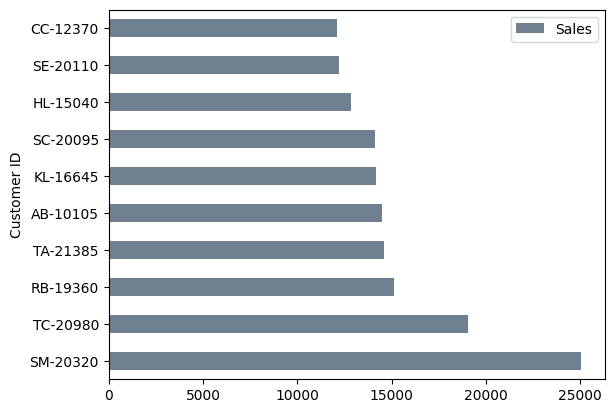

In [161]:
top_customer = train.groupby("Customer ID").agg({'Sales':sum}).sort_values(by= "Sales",ascending=False).head(10).plot.barh(color= color_list)

**Observation:**
* Here the top 10 Customer who bought the product maybe at high amount or product which have high cost here Customer ID SM-20320 is on top 

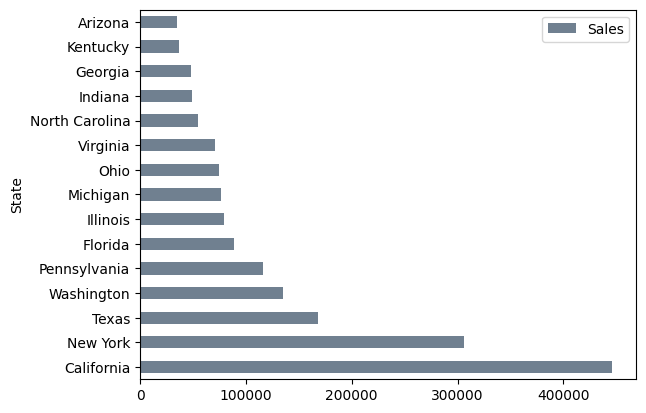

In [162]:
top_States= train.groupby("State").agg({'Sales':sum}).sort_values(by= "Sales",ascending=False).round(2).head(15).plot.barh(color= color_list)

**Observation**
* Above chart shows top 15 States from which California is the on the top in terms of the Sales

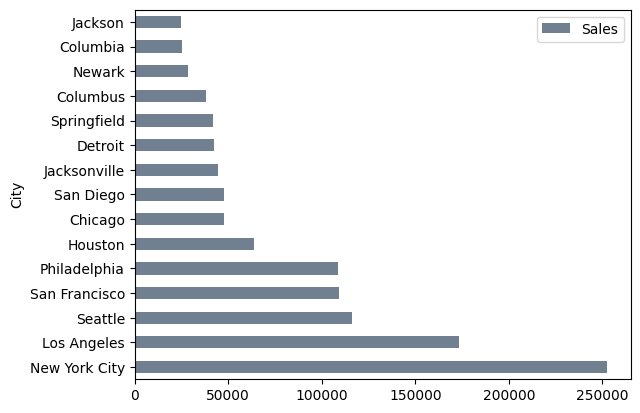

In [163]:
top_cities= train.groupby("City").agg({'Sales':sum}).sort_values(by= "Sales",ascending=False).round(2).head(15).plot.barh(color='slategray')

**Observation**
* The above bar chart shows top 15 cities out of 529 cities based on their Sales 
* Most of the sales are done by New York City

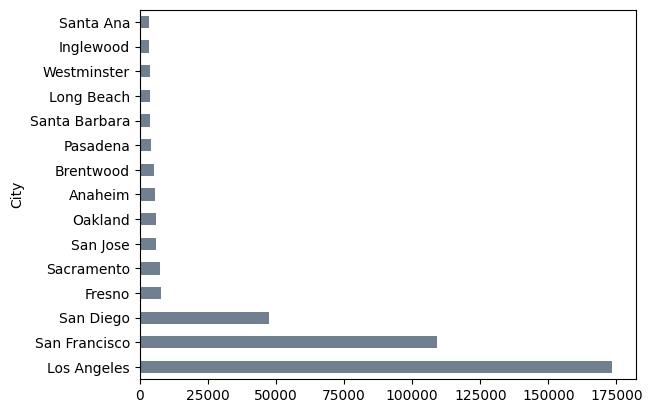

In [164]:
train.loc[train['State']=='California',['City','Sales']].groupby('City')['Sales'].sum().sort_values(ascending= False).head(15).plot.barh(color='Slategray');

**Observation**
* As we saw in above bar chart California State is having most Sales so lets have look which cities are contributed to it.
* Out of 80 cities in California here are top 15 cites from which Los Angeles have most sales.

array([<Axes: ylabel='Sales'>], dtype=object)

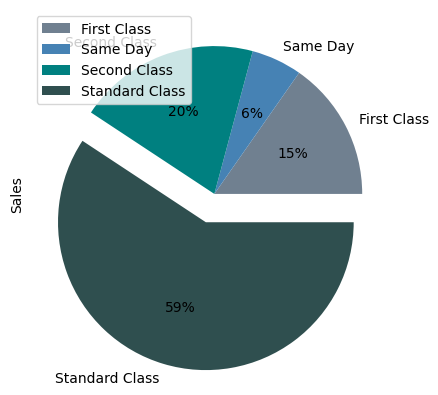

In [165]:
train.groupby("Ship Mode").agg({'Sales':sum}).plot.pie(subplots=True, explode = [0,0,0,0.2],autopct='%1.0f%%',colors=['slategray','steelblue','teal','darkslategray'])

**Observation**
* 59% Standard Class ship mode are used, or we can say Standard Class ship mode is on high demand 

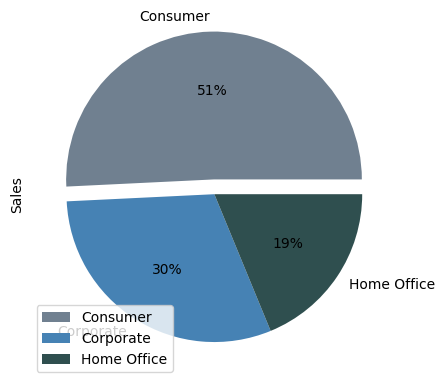

In [166]:
train.groupby('Segment').agg({'Sales':sum}).plot.pie(subplots=True, explode = [0.1,0,0],autopct='%1.0f%%',colors=['slategray','steelblue','darkslategray']);

**Observation**
* 51% of the sales was from Consumer

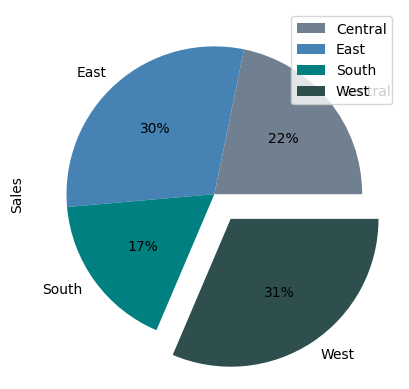

In [167]:
train.groupby('Region').agg({'Sales':sum}).plot.pie(subplots=True, explode = [0,0,0,0.2],autopct='%1.0f%%',colors=['slategray','steelblue','teal','darkslategray']);

**Observation**
* West region gave 31% of product order

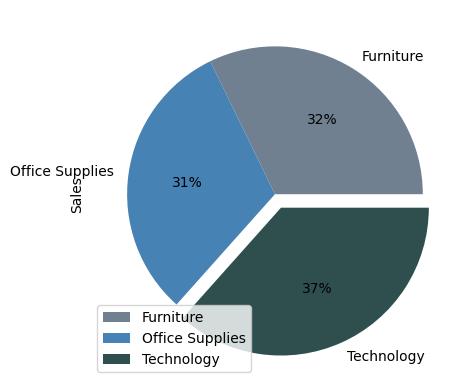

In [168]:
train.groupby('Category').agg({'Sales':sum}).plot.pie(subplots=True, explode = [0,0,0.1],autopct='%1.0f%%',colors=['slategray','steelblue','darkslategray']);

**Observation**
* 37% of the product sales price was from Technological product

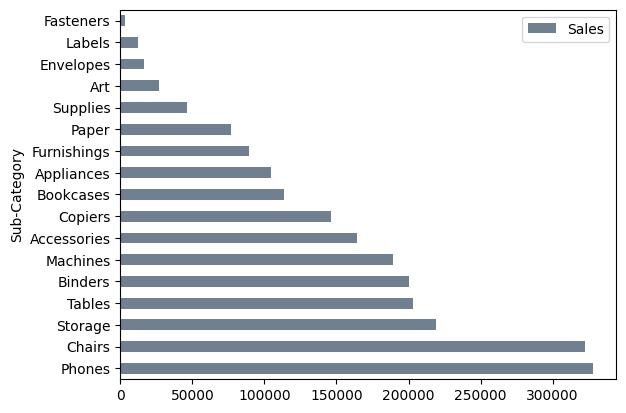

In [169]:
train.groupby('Sub-Category').agg({'Sales':sum}).sort_values(by= "Sales",ascending=False).round(2).plot.barh(color='slategray');

**Observation**
* Phones are the top demanded product in sub-category

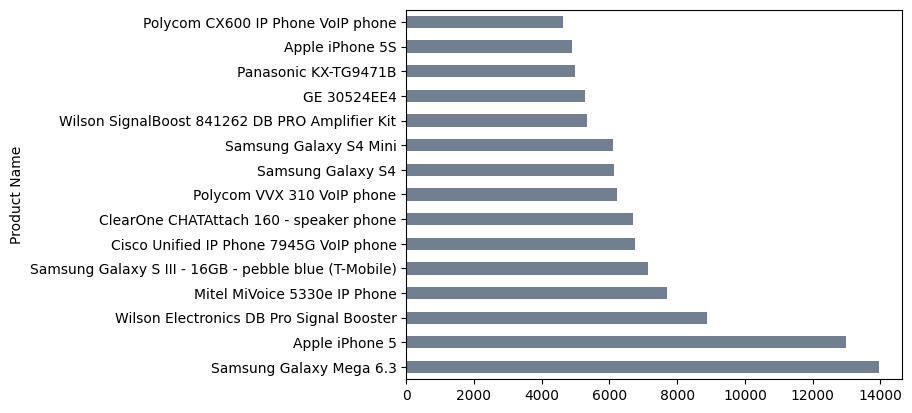

In [170]:
train.loc[train['Sub-Category']=='Phones',['Product Name','Sales']].groupby('Product Name')['Sales'].sum().sort_values(ascending= False).head(15).plot.barh(color='Slategray');

**Observation**
* Here we can say Samsung Galaxy Mega 6.3 was not most ordered product but still it contributed more in selling price of the product 

### Top product names from all sub-category

In [171]:
train['rank'] =train.groupby(['Sub-Category'])['Sales'].rank('dense',ascending=False)

In [172]:
pd.DataFrame(train.loc[train['rank']==1,['Sub-Category', 'Product Name']].values,columns=['Sub-Category','Top Product name from each Sub-Category'])

,Sub-Category,Top Product name from each Sub-Category
0,Art,Hunt BOSTON Model 1606 High-Volume Electric Pe...
1,Accessories,Logitech P710e Mobile Speakerphone
2,Labels,"Dot Matrix Printer Tape Reel Labels, White, 50..."
3,Phones,Apple iPhone 5
4,Supplies,High Speed Automatic Electric Letter Opener
5,Envelopes,Ames Color-File Green Diamond Border X-ray Mai...
6,Machines,Cisco TelePresence System EX90 Videoconferenci...
7,Storage,Smead Adjustable Mobile File Trolley with Lock...
8,Paper,Xerox 1941
9,Copiers,Canon imageCLASS 2200 Advanced Copier


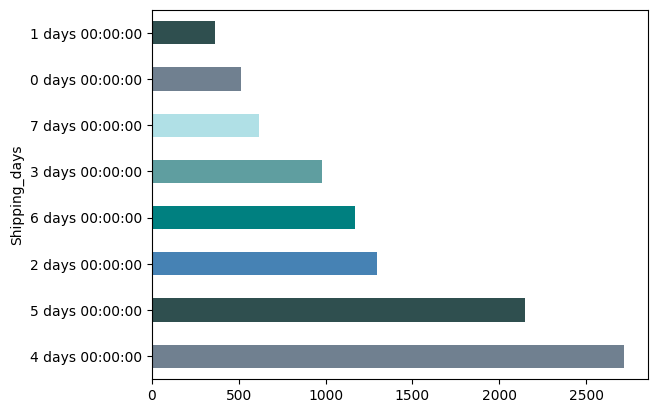

In [173]:
train['Shipping_days'] = train['Ship Date'] - train['Order Date']
time_taken = train['Shipping_days'].value_counts().plot.barh(color=color_list)

**Observation**
* The Maximum days taken for the shipping after order was placed is for 4 days  

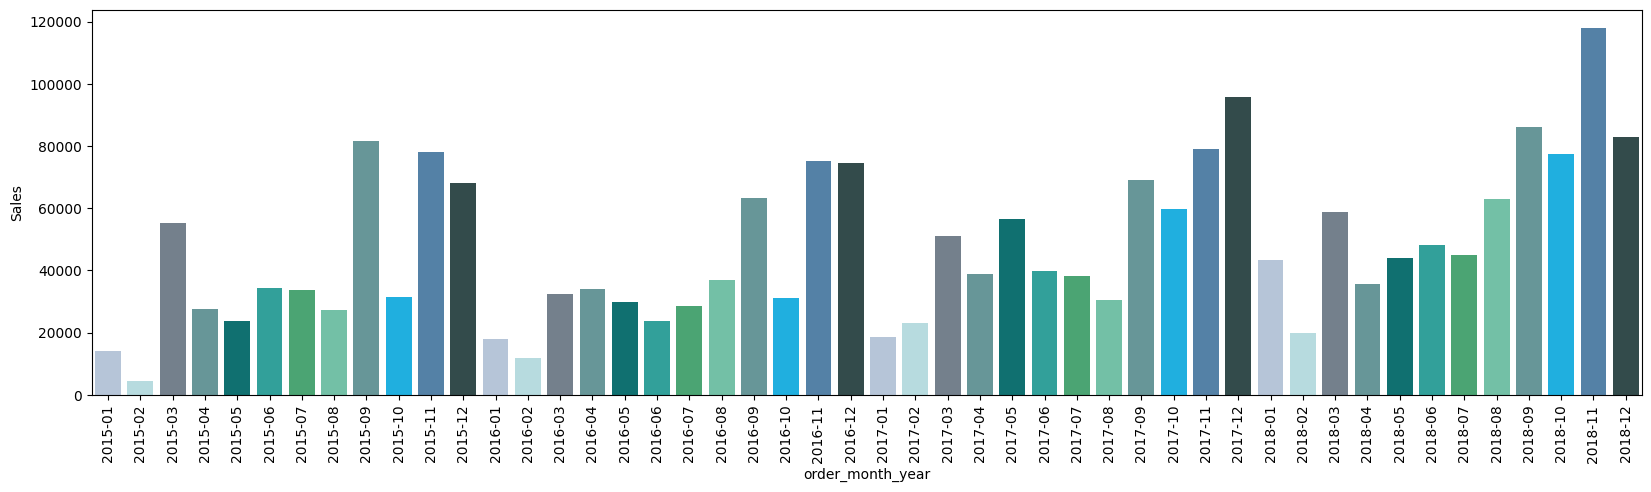

In [174]:
color_month = ['lightsteelblue','powderblue','slategray','cadetblue', 'teal', 'lightseagreen',
             'mediumseagreen','mediumaquamarine','cadetblue','deepskyblue', 'steelblue','darkslategray']

monthly_sales = pd.DataFrame(train.groupby('order_month_year')['Sales'].sum()).reset_index()
plt.figure(figsize=(20, 5))
sns.barplot(x = 'order_month_year', y = 'Sales',data = monthly_sales,palette=color_month)
plt.xticks(rotation=90)
plt.show()

**Observation:**
* From the above plot we can say that in every year September, November and December were the months having most sales
* Let's check the same with the product category 


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


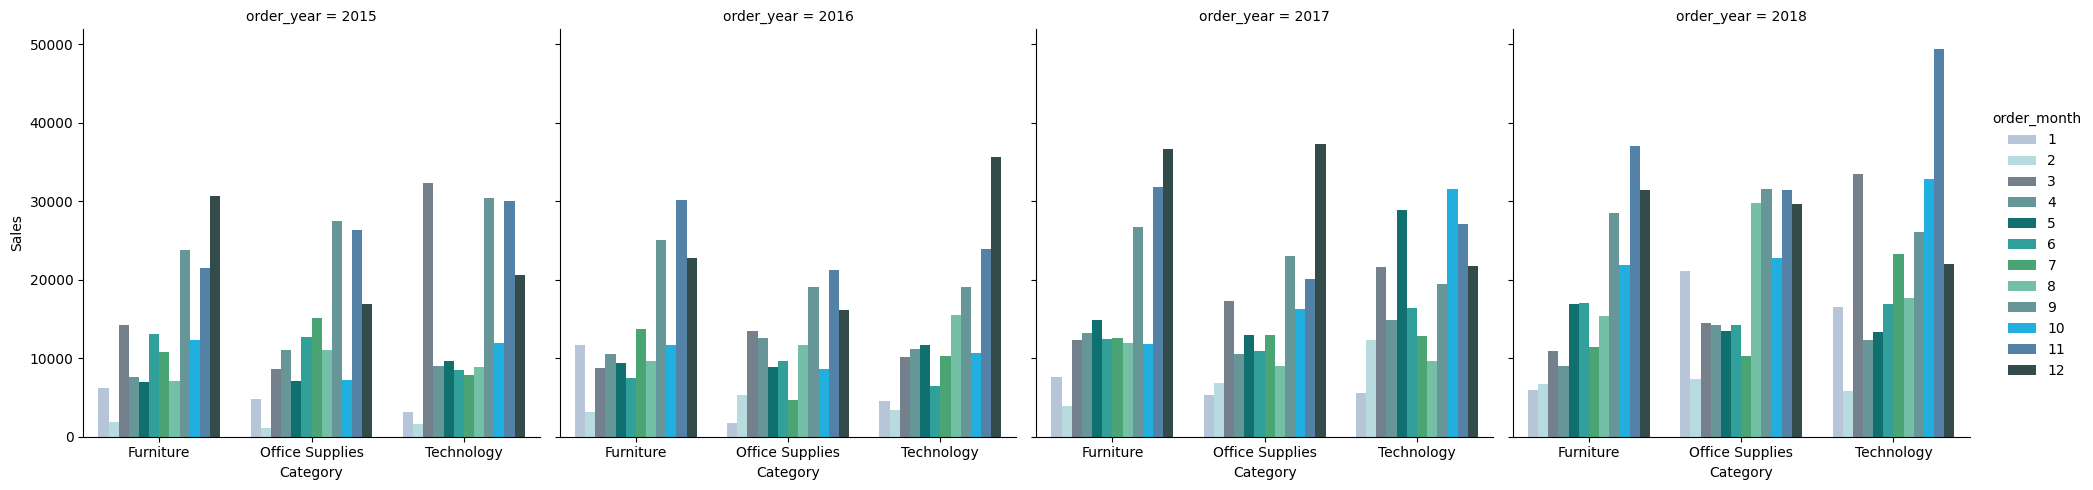

In [175]:
sale = train.groupby(['order_year','order_month','Category']).agg({'Sales':sum}).reset_index()
sns.catplot(data = sale, kind="bar",x="Category", y="Sales",col='order_year',hue='order_month',height=5, aspect=1, palette=color_month);

**Observation:**
* As you observed in every year most profit related to Furniture happened in the month of 9,11,12 i.e., Sept,Nov,Dec resp.
* Whereas in each year in the month of 9 and 11 most of the sales profit done from the Office Supplies category products but only in year 2017 Dec also included in this profitable month
* But regarting to Technological products its varies in every year but overall we can say that in the 1st quarter of the year month 3 and in 3rd quarter month 9 and whole 4th quarter of the year are more favourable of the sales

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


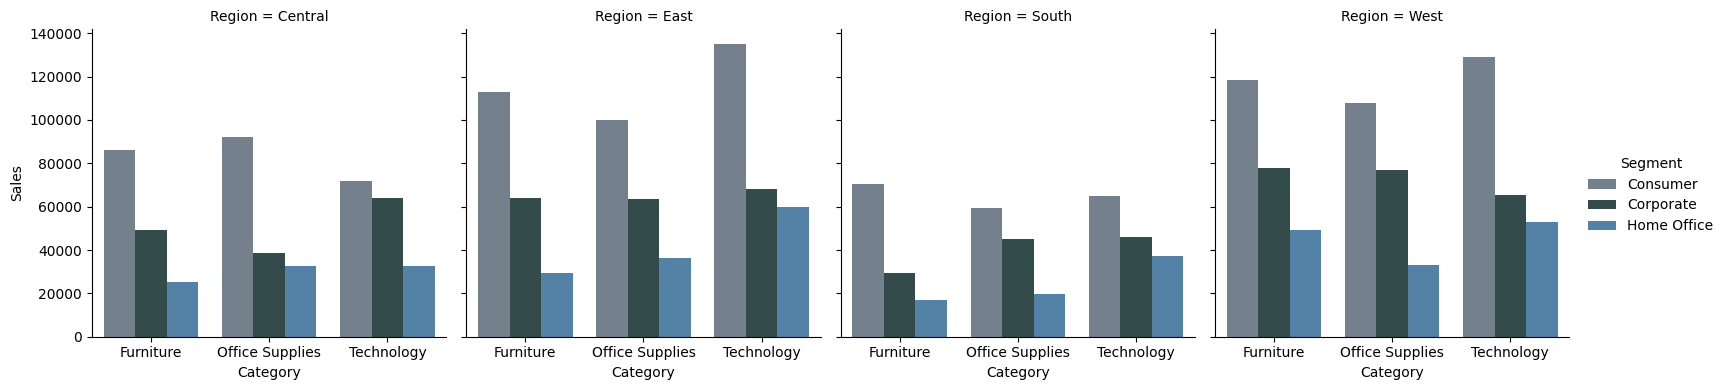

In [176]:
sale = train.groupby(['Region','Category','Segment']).agg({'Sales':sum}).reset_index()
sns.catplot(data = sale, kind="bar",x="Category", y="Sales", col="Region",hue='Segment',height=4, aspect=1, palette=color_list[0:3]);

**Observation**
* As you can see the Consumer were responsible for most of the sales of each product category in every region. 
* The sales of technological products is highest in the western and eastern regions, followed by furniture then office Supplies.
* Whereas in Central and Southern region sales of Furniture and office Supplies are more tha the Technological products.

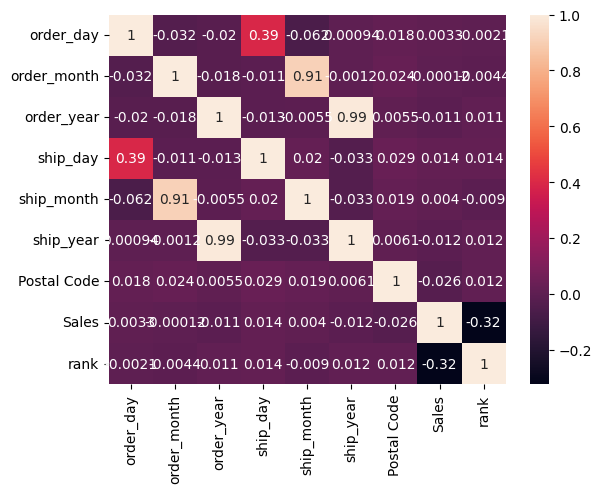

In [177]:
sns.heatmap(train.corr(numeric_only=True),annot=True);

**Observation:**
* The highest correlation is between the order year and shipping year followed by the order month and shipping month which may the signified that the delay rate of shipping is much less

## Time Series Analysis

In [178]:
regions = train['Region'].unique()
shipModes = train['Ship Mode'].unique()
categories = train['Category'].unique()

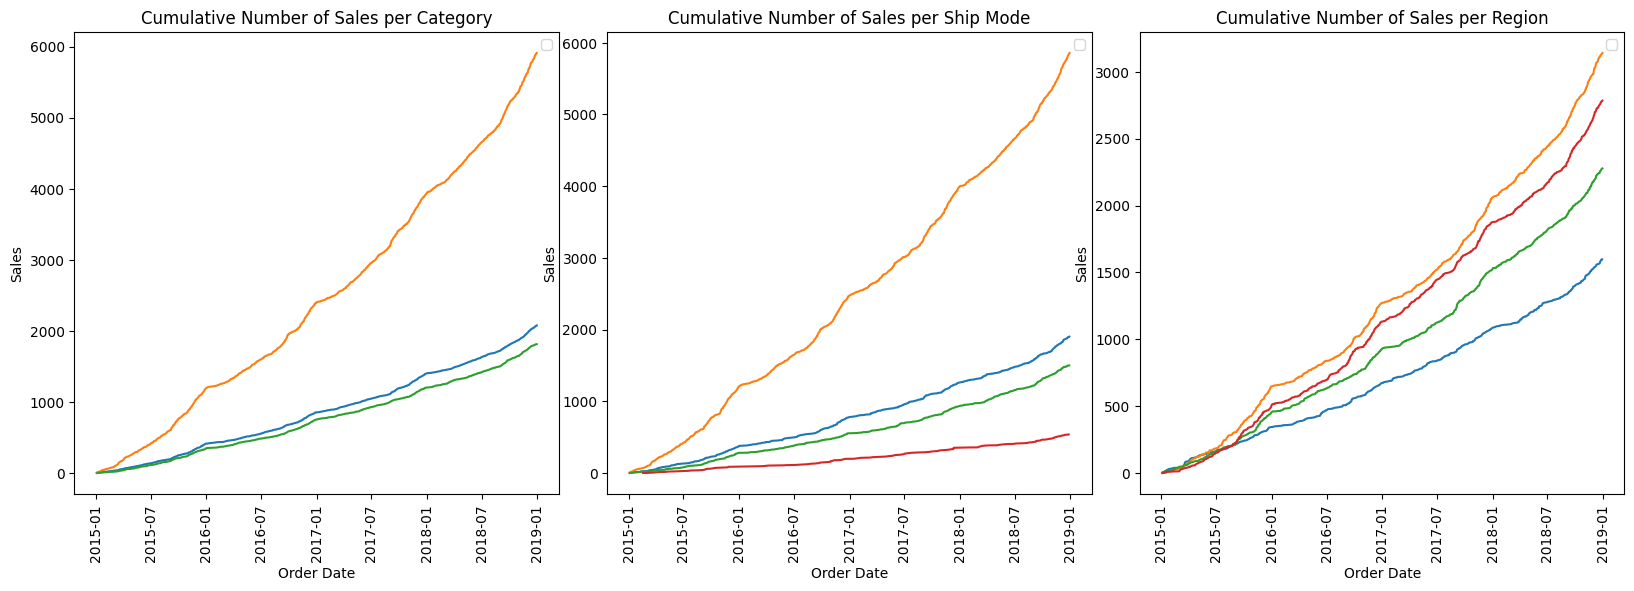

In [179]:
plt.figure(5, figsize=(20, 6))
plt.subplots_adjust(wspace=0.1);
#graphing 'Sales' vs. 'Category'
dfbyCatOrderDate = train.groupby(['Category','Order Date'])
plt.subplot(131).title.set_text('Cumulative Number of Sales per Category')
plt.xticks(rotation=90) 
plt.legend()
for cat in categories:
    data = dfbyCatOrderDate['Sales'].count()[cat]
    data = data.cumsum()
    sns.lineplot(data=data, ax=plt.subplot(131))

#graphing 'Sales' vs. 'Ship Mode'
dfbyShipOrderDate = train.groupby(['Ship Mode','Order Date'])
plt.subplot(132).title.set_text('Cumulative Number of Sales per Ship Mode')
plt.xticks(rotation=90)
plt.legend()
for shipMode in shipModes:
    data = dfbyShipOrderDate['Sales'].count()[shipMode]
    data = data.cumsum()
    sns.lineplot(data=data, ax=plt.subplot(132))
    
#graphing 'Sales' vs. 'Region'
dfbyRegionOrderDate = train.groupby(['Region','Order Date'])
plt.subplot(133).title.set_text('Cumulative Number of Sales per Region')
plt.xticks(rotation=90)
plt.legend()
for region in regions:
    data = dfbyRegionOrderDate['Sales'].count()[region]
    data = data.cumsum()
    sns.lineplot(data=data, ax=plt.subplot(133))

**Observation**
* As year passes sales are increasing

In [180]:
train.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'order_month_year', 'ship_month_year', 'order_day', 'order_month',
       'order_year', 'ship_day', 'ship_month', 'ship_year', 'Segment',
       'Country', 'City', 'State', 'Postal Code', 'Region', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'rank', 'Shipping_days'],
      dtype='object')

**Conclusion from the Data Visualization:**
* We can say that more profitable region is West and East whereas New york and California having highest profitable states.
* and in terms of the Product Category Technology is highest but Furniture and Office Supplier are also good there are so many demand in all these product category
* And in terms of the month the 9,11,12 are most preferable month maybe due to festive season or holidays 

## Drop Unwanted Features

* As you can see there is Customer ID to train our model so just remove these. 
* As we have Country, City, State and, Postal Code so insteading of keeping all of these we just keep Postal Code.
* Shipping_days and rank columns were just created for the analysis purpose so here I'm dropping these columns.

In [181]:
train.drop(['Customer ID','Country','City','State','Shipping_days','rank'],axis=1,inplace=True)

In [182]:
pd.set_option('display.max_columns',None)
train.sample()

,Order Date,Ship Date,Ship Mode,order_month_year,ship_month_year,order_day,order_month,order_year,ship_day,ship_month,ship_year,Segment,Postal Code,Region,Category,Sub-Category,Product Name,Sales
5785,2018-10-02,2018-10-08,Standard Class,2018-10,2018-10,2,10,2018,8,10,2018,Consumer,97477,West,Office Supplies,Supplies,Acme Softgrip Scissors,39.072


In [183]:
train.shape

(9799, 18)

## Handling Outliers:
* As we already see in the Data Visualization part, the Sales column having some outliers so it is important to handle this  

In [184]:
train['Sales_log'] = np.log(train['Sales'])

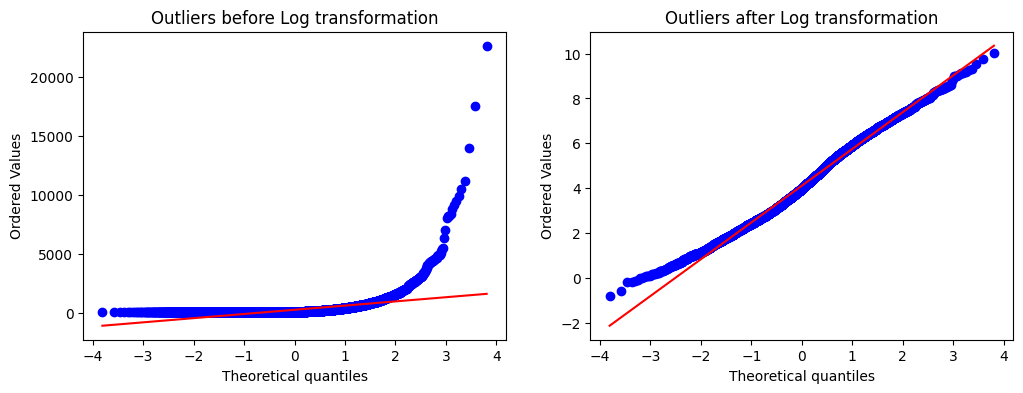

In [185]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
stats.probplot(train['Sales'], dist="norm", plot=ax1)
ax1.set_title('Outliers before Log transformation')
ax2 = fig.add_subplot(122)
stats.probplot(train['Sales_log'],dist="norm", plot=ax2)
ax2.set_title('Outliers after Log transformation')
plt.show()

In [186]:
pd.set_option('display.max_columns',None)
train.sample(2)

,Order Date,Ship Date,Ship Mode,order_month_year,ship_month_year,order_day,order_month,order_year,ship_day,ship_month,ship_year,Segment,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Sales_log
7264,2018-06-13,2018-06-17,Standard Class,2018-06,2018-06,13,6,2018,17,6,2018,Consumer,22153,South,Office Supplies,Art,Boston 1799 Powerhouse Electric Pencil Sharpener,181.860,5.203237
4169,2016-04-13,2016-04-14,First Class,2016-04,2016-04,13,4,2016,14,4,2016,Home Office,85204,West,Office Supplies,Paper,Xerox 210,31.104,3.437336


## Data Encoding

### Feature mapping

In [187]:
train['Ship Mode_encoded'] = train['Ship Mode'].replace(['Standard Class', 'First Class', 'Second Class', 'Same Day'],[1,2,3,4])
train.sample()

,Order Date,Ship Date,Ship Mode,order_month_year,ship_month_year,order_day,order_month,order_year,ship_day,ship_month,ship_year,Segment,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Sales_log,Ship Mode_encoded
5627,2018-06-26,2018-07-01,Standard Class,2018-06,2018-07,26,6,2018,1,7,2018,Corporate,33180,South,Office Supplies,Labels,Avery 512,13.872,2.629872,1


### Label Encoding

In [188]:
X = train.drop(['Ship Mode','Order Date', 'order_month_year', 'Ship Date', 'ship_month_year', 'Sales', 'Sales_log'], axis=1)
for col in X.columns:
    if X[col].dtype == 'object':
        label = LabelEncoder()
        X[col] = label.fit_transform(X[col].values)
        
y = train['Sales_log']

In [189]:
X.sample()

,order_day,order_month,order_year,ship_day,ship_month,ship_year,Segment,Postal Code,Region,Category,Sub-Category,Product Name,Ship Mode_encoded
4845,23,7,2016,26,7,2016,0,14609,1,1,3,49,3


# Data Spliting

In [190]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((6859, 13), (6859,), (2940, 13), (2940,))

# Modeling

In [191]:
class Regression_Models:
    def __init__(self,model_list,X_train,y_train,X_test,y_test):
        self.model_list = model_list
        self.X_train= X_train
        self.y_train= y_train
        self.X_test = X_test
        self.y_test = y_test
        
    def pipelining(self,model):
        p1=Pipeline([('sc',StandardScaler()),('model',model)])
        p1.fit(X_train,y_train)
        pred = p1.predict(X_test)
        decor = '_'*30
        print(f'{decor}{type(model).__name__}{decor}\n\nTrain: {p1.score(X_train,y_train)},\
        \nTest: mse:{mean_squared_error(y_test,pred)}, r2:{r2_score(y_test, pred)}\n\n')
        
    def models(self):
        for model in self.model_list:
            self.pipelining(model) 

In [192]:
model_list = [RandomForestRegressor(),LinearRegression(), Ridge(), KNeighborsRegressor(),
             Lasso(),SVR(),DecisionTreeRegressor(),XGBRegressor()]

default_parameter = Regression_Models(model_list,X_train,y_train,X_test,y_test)
default_parameter.models()

______________________________RandomForestRegressor______________________________

Train: 0.9510381698099729,        
Test: mse:0.9596511896413079, r2:0.6496794113399189


______________________________LinearRegression______________________________

Train: 0.030777412584183206,        
Test: mse:2.6765459891015473, r2:0.02292710455733238


______________________________Ridge______________________________

Train: 0.030749963345574227,        
Test: mse:2.676762344417393, r2:0.02284812406689507


______________________________KNeighborsRegressor______________________________

Train: 0.449989649262166,        
Test: mse:2.278723768725139, r2:0.16815207372182128


______________________________Lasso______________________________

Train: 0.0,        
Test: mse:2.739370837185684, r2:-7.101121651142961e-06


______________________________SVR______________________________

Train: 0.40655401037590244,        
Test: mse:1.920855044901694, r2:0.29879202222198487


______________________________De

## Feature importance and selection

In [193]:
rfr = RandomForestRegressor(100)
rfr.fit(X_train,y_train)

RandomForestRegressor()

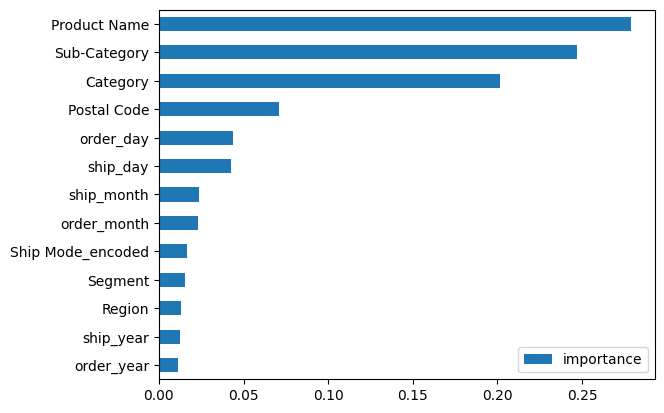

In [194]:
feature_importance = pd.DataFrame({'importance': rfr.feature_importances_},
                                  index= X.columns).sort_values('importance')
feature_importance.plot.barh();

In [195]:
X_imp =X[feature_importance[feature_importance['importance'] > 0.05].index]
X_imp

,Postal Code,Category,Sub-Category,Product Name
0,42420,0,4,386
1,42420,0,5,838
2,90036,1,10,1432
3,33311,0,16,366
4,33311,1,14,573
...,...,...,...,...
9795,60610,1,3,408
9796,43615,1,2,277
9797,43615,2,13,724
9798,43615,2,13,148


In [196]:
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,test_size=0.3,random_state=0)

In [197]:
feature_select_ = Regression_Models(model_list,X_train,y_train,X_test,y_test)
default_parameter.models()

______________________________RandomForestRegressor______________________________

Train: 0.9584671363703352,        
Test: mse:0.7884896686446355, r2:0.7121619106466941


______________________________LinearRegression______________________________

Train: 0.02631542480993687,        
Test: mse:2.679586015826046, r2:0.02181734304902161


______________________________Ridge______________________________

Train: 0.026315424165005763,        
Test: mse:2.6795843014286937, r2:0.021817968889635386


______________________________KNeighborsRegressor______________________________

Train: 0.6384099927483675,        
Test: mse:1.5135745659325701, r2:0.44746972791581385


______________________________Lasso______________________________

Train: 0.0,        
Test: mse:2.739370837185684, r2:-7.101121651142961e-06


______________________________SVR______________________________

Train: 0.4285337741415314,        
Test: mse:1.6258445203629002, r2:0.4064855901901321


______________________________D

## Hyperparameter tunning

In [198]:
from sklearn.model_selection import RandomizedSearchCV


In [199]:
hyperparameter_model_list = [KNeighborsRegressor(),DecisionTreeRegressor(),
                             Lasso(),Ridge(),RandomForestRegressor()]


hyperparameters = [{'metric' : ['euclidean','minkowski','manhattan'], 
                      'n_neighbors' :range(3,11)},
                 {"max_depth": range(3,6),
                     "max_features": range(1,11),
                     "min_samples_split": range(2,11),
                     "criterion": ["squared_error", "friedman_mse", "absolute_error"]},
                 {"alpha":[0.001,0.01,0.1,1,10,1000]},
                 {'alpha':[0.001,0.01,0.1,1,10,1000]},
                 {"n_estimators":[50,100,200],
                               "max_depth": range(3,6),
                               "max_features": range(1,11),
                               "min_samples_split": range(2,11)}]


In [200]:
def randomized(hyperparameter_model_list,hyperparameters,cv=5):
    
    for model,hyperparameter in zip(hyperparameter_model_list,hyperparameters):
    
        random_search = RandomizedSearchCV(model,param_distributions=hyperparameter,cv=cv,n_iter=10)
        random_search.fit(X_train,y_train)

        pred = random_search.predict(X_test)

        print(f'{type(model).__name__}\n\ntrain score : {random_search.score(X_train,y_train)} ,\
        \ntest score : mse:{mean_squared_error(y_test,pred)}, r2:{r2_score(y_test, pred)}\n')

        print(random_search.best_params_,'\n\n')

In [201]:
randomized(hyperparameter_model_list,hyperparameters)

KNeighborsRegressor

train score : 0.2681192044164785 ,        
test score : mse:2.5262246059595888, r2:0.07780191323669405

{'n_neighbors': 9, 'metric': 'manhattan'} 


DecisionTreeRegressor

train score : 0.4591123851389243 ,        
test score : mse:1.522970823134364, r2:0.4440396249891825

{'min_samples_split': 10, 'max_features': 7, 'max_depth': 5, 'criterion': 'friedman_mse'} 


Lasso

train score : 0.02631443432750913 ,        
test score : mse:2.679459681409342, r2:0.021863461417555352

{'alpha': 0.001} 




/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Ridge

train score : 0.026315411455204774 ,        
test score : mse:2.67957119517807, r2:0.021822753325358768

{'alpha': 10} 


RandomForestRegressor

train score : 0.47793261584764724 ,        
test score : mse:1.4793352056420523, r2:0.459968803602681

{'n_estimators': 100, 'min_samples_split': 10, 'max_features': 5, 'max_depth': 5} 


